<a href="https://colab.research.google.com/github/valwork/portfolio/blob/main/%D0%B4%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC_%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('genres_v2.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39087 entries, 0 to 42304
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      39087 non-null  float64
 1   energy            39087 non-null  float64
 2   key               39087 non-null  int64  
 3   loudness          39087 non-null  float64
 4   mode              39087 non-null  int64  
 5   speechiness       39087 non-null  float64
 6   acousticness      39087 non-null  float64
 7   instrumentalness  39087 non-null  float64
 8   liveness          39087 non-null  float64
 9   valence           39087 non-null  float64
 10  tempo             39087 non-null  float64
 11  type              39087 non-null  object 
 12  id                39087 non-null  object 
 13  uri               39087 non-null  object 
 14  track_href        39087 non-null  object 
 15  analysis_url      39087 non-null  object 
 16  duration_ms       39087 non-null  int64 

In [ ]:
data['title'].isna().value_counts()

True     21525
False    20780
Name: title, dtype: int64

In [ ]:
data.drop(['Unnamed: 0','title'], axis = 1 , inplace=True)

In [ ]:
data.duplicated().sum()

3218

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
new_data = data.dropna()

In [ ]:
new_data.shape

(21519, 20)

In [ ]:
user_songs = new_data.sample(frac = 0.01, random_state = 42)
rest_part = new_data.drop(user_songs.index)

In [ ]:
user_songs.reset_index(inplace = True)
rest_part.reset_index(inplace = True)
new_data.reset_index(inplace = True)

In [ ]:
new_data

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,...,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,...,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,...,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,...,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,...,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,...,160.299,audio_features,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,Daddy's Girl
21515,21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,...,154.272,audio_features,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,'94
21516,21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,...,184.160,audio_features,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,Born 2 Live
21517,21523,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,...,188.760,audio_features,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,Can't Hold On


(array([21519., 16941., 11066.,  9110.,  7430.,  5582.,  3483.,  3022.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <a list of 8 Patch objects>)

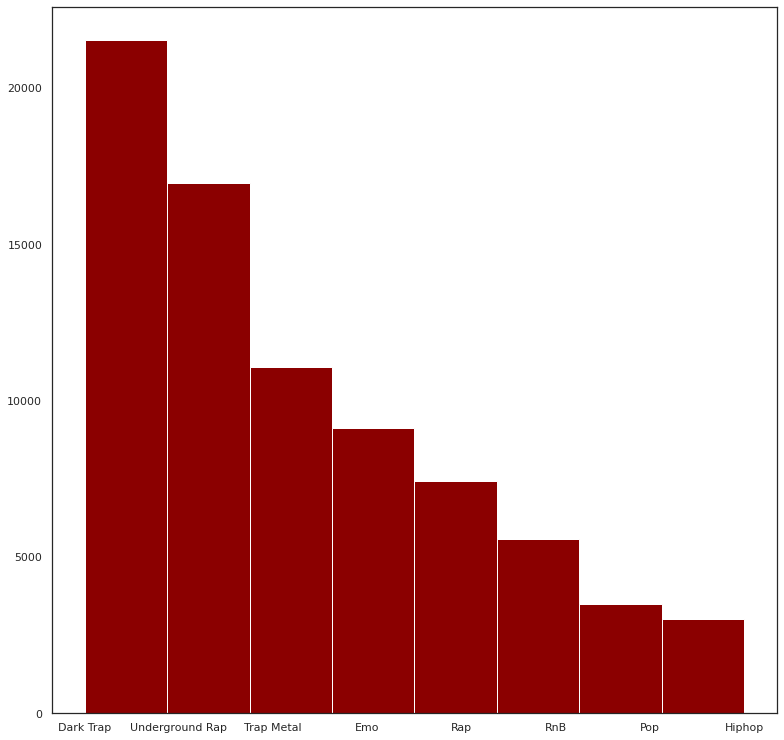

In [ ]:
plt.figure(figsize = (13, 13))
plt.hist(new_data['genre'], bins = 8, color = 'darkred', cumulative = -1)

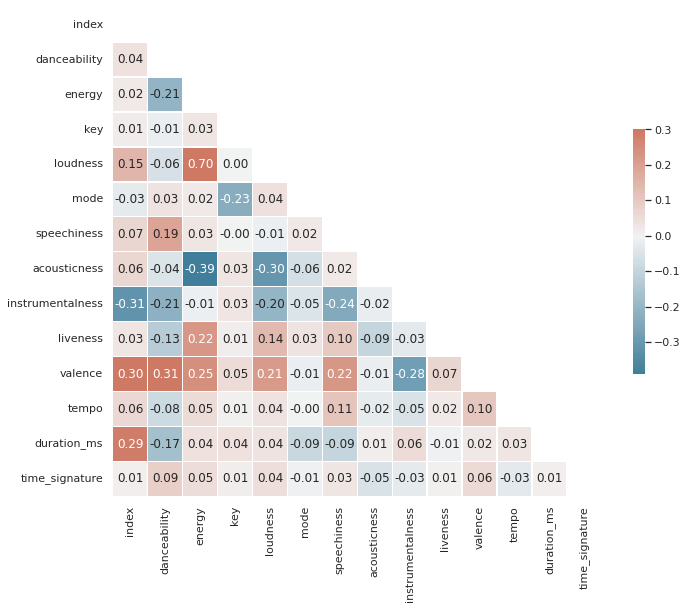

In [ ]:
from string import ascii_letters

sns.set_theme(style = "white")
corr = new_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square=True, linewidths = .5, cbar_kws={"shrink": .5}, annot = True, fmt='.2f')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa641fc3b20>,
      dtype=object)

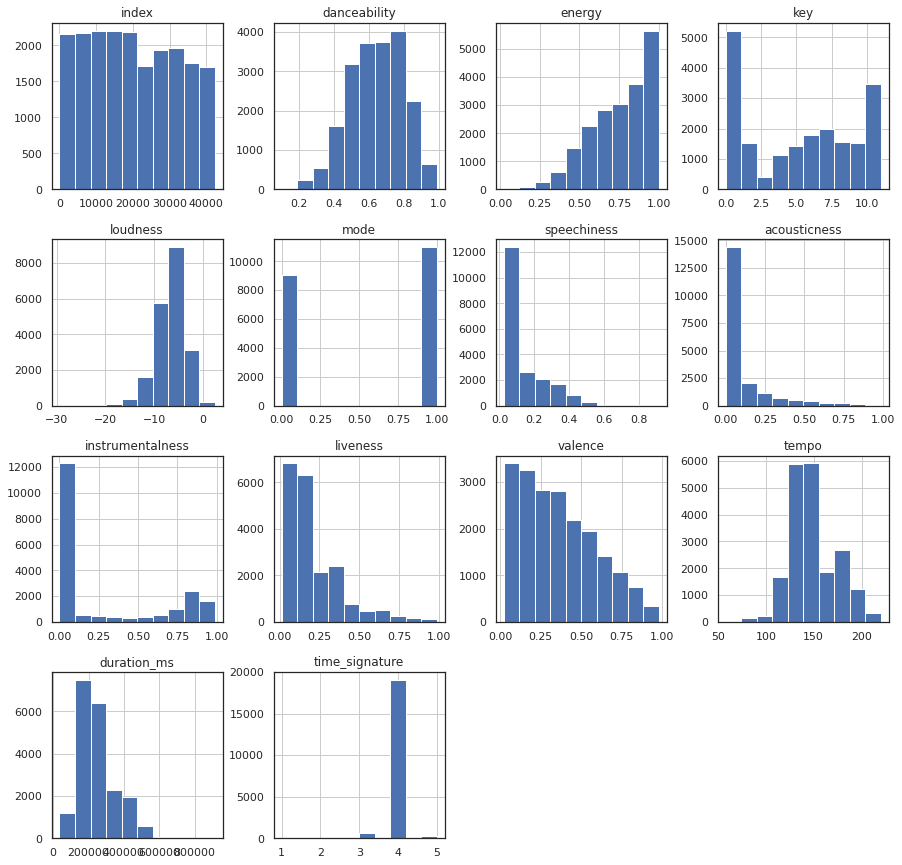

In [ ]:
new_data.hist(figsize=(15, 15))

In [ ]:
import plotly.express as px

In [ ]:
px.box(data_frame = new_data, y='duration_ms', color='genre')

In [ ]:
import scipy.stats
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
import math
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
feature_cols = ['energy','loudness','valence','danceability','acousticness','instrumentalness','speechiness','tempo']

In [ ]:
normalized = preprocessing.normalize(rest_part[feature_cols])
normalized = pd.DataFrame(normalized, columns = feature_cols)

In [ ]:
normalized['mean']  = normalized.mean(axis =1)

In [ ]:
cosine = cosine_similarity(normalized)

In [ ]:
linear = linear_kernel(normalized)

In [ ]:
def getSongIndex(songName):
    bool = new_data['song_name'].isin([songName])
    sindex = bool[bool == True].index[0]
    return sindex

In [ ]:
def recommendation(m_name, model = linear_kernel):
    SongIndex = getSongIndex(m_name)
    score = list(enumerate(model[SongIndex]))
    sim_score = sorted(score, key = lambda x:x[1], reverse = True)
    sim_score = sim_score[1:2]
    Index = [i[0] for i in sim_score]
    return pd.DataFrame(new_data[["song_name", "genre", "valence", "duration_ms"]].iloc[Index])

In [ ]:
oneday_playlist = user_songs.sample(n = 15, random_state = 50)

In [ ]:
pd.DataFrame(oneday_playlist[["song_name", "genre", "valence", "duration_ms"]])

,song_name,genre,valence,duration_ms
146,Here We Go Again,Emo,0.5440,226293
73,Make It Rain,Underground Rap,0.5650,204000
121,Ay3,Underground Rap,0.4850,195093
1,Roses,Dark Trap,0.0920,194292
23,World Without You,Dark Trap,0.0992,106696
125,Don't Lie,Rap,0.5790,238664
118,"Me, Myself and I",RnB,0.5360,301133
143,Lacombe,Trap Metal,0.5440,109877
136,One Love,Hiphop,0.9030,172813
20,Megazord (Remix),Hiphop,0.6060,305971


In [ ]:
whole_playlist = []
for el in oneday_playlist['song_name']:
  whole_playlist.append(recommendation(el, model = cosine))

In [ ]:
final_rec = pd.DataFrame(np.reshape(np.array(whole_playlist), newshape = (15, 4)), columns = ('song_name', 'genre', 'positivness', 'duration_ms')).drop_duplicates()
final_rec

,song_name,genre,positivness,duration_ms
0,Newport Reds,Underground Rap,0.166,192052
1,Real Street Migo,Underground Rap,0.949,168000
2,40oz,Underground Rap,0.0563,128313
3,Aureolin,Dark Trap,0.0397,212326
4,ROADKILL,Trap Metal,0.0576,175052
5,Dark Light,Trap Metal,0.0362,206472
6,Baby Boy (feat. Sean Paul),RnB,0.791,244827
7,Ice Age,Hiphop,0.42,171908
8,Lament,Dark Trap,0.0887,295680
9,No One's Gonna Need You More,Emo,0.151,256907


In [ ]:
recommendation('Dead To Me', model = cosine)

15885                              Kings Never Die
18654                                      Hol' Up
12340                                       PSYCHO
3283                                  Winter Falls
17458                Jet Lag (feat. Young Scooter)
18400    Lemonade (feat. Gunna, Don Toliver & NAV)
16130                               On the Hotline
19002                                       Skills
6513                                    MOUTHGUARD
10022                 forget me too (feat. Halsey)
Name: song_name, dtype: object